In [5]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import RMSprop

max_words = 10000
maxlen_for_padding = 500

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

train_x = sequence.pad_sequences(train_x, maxlen=maxlen_for_padding)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen_for_padding)

# 'train_x'dataset에 포함된 10개의 데이터 길이 확인
for i in range(10):
    
    print(len(train_x[i]))

500
500
500
500
500
500
500
500
500
500


In [8]:
model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length = maxlen_for_padding))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4), loss = "binary_crossentropy", metrics = ["acc"])
history = model.fit(train_x, train_y, epochs = 10, batch_size = 128, validation_split = 0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

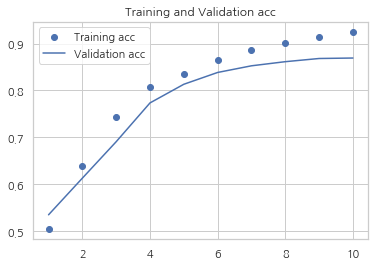

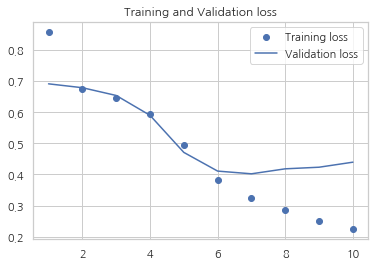

In [9]:
# 위 모델링에 대한 결과
%matplotlib inline

acc = history.history["acc"]
loss = history.history["loss"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]

epochs = list(range(1, len(acc) + 1))

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.legend()
plt.title("Training and Validation acc")

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.legend()
plt.title("Training and Validation loss")

plt.show()

In [10]:
# 오버피팅 직전 epoch까지만 학습시키고, test dataset으로 최종 평가
model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length = maxlen_for_padding))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4), loss = "binary_crossentropy", metrics = ["acc"])
history = model.fit(train_x, train_y, epochs = 7, batch_size = 128, validation_split = 0.2)

model.evaluate(test_x, test_y)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

[0.4262034296989441, 0.8535199761390686]